In [1]:
# Title of Project: Predicting House Prices
# Objective: To develop a machine learning model to predict house prices based on various features.

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

Saving data.csv to data.csv


In [3]:
# Read the uploaded file
data = pd.read_csv('data.csv')

In [4]:
# Describe Data
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nDataset summary statistics:")
print(data.describe())

First 5 rows of the dataset:
    Price  Bedrooms  Bathrooms  SquareFeet  Location
0  450000         3          2        2000     Urban
1  350000         2          1        1500  Suburban
2  500000         4          3        2500     Urban
3  300000         2          1        1200     Rural
4  400000         3          2        1800  Suburban

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       10 non-null     int64 
 1   Bedrooms    10 non-null     int64 
 2   Bathrooms   10 non-null     int64 
 3   SquareFeet  10 non-null     int64 
 4   Location    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes
None

Dataset summary statistics:
               Price   Bedrooms  Bathrooms   SquareFeet
count      10.000000  10.000000  10.000000    10.000000
mean   420000.000000   2.800000   1.900000  1900.000000


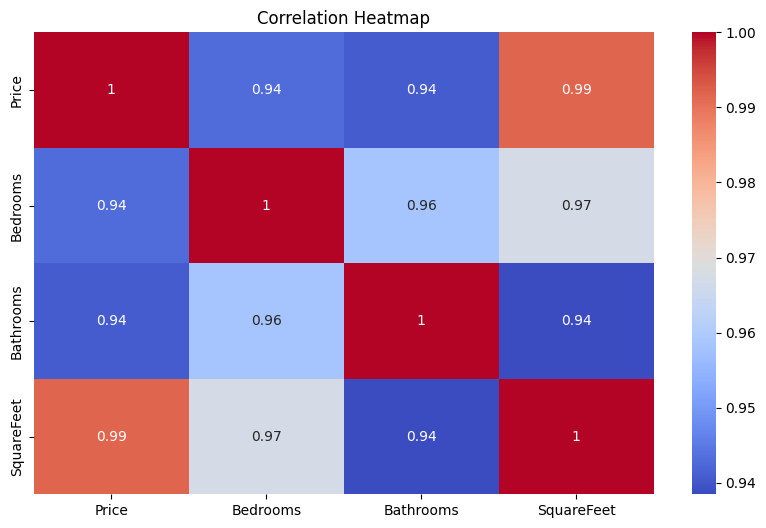

In [8]:
# Data Visualization: Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

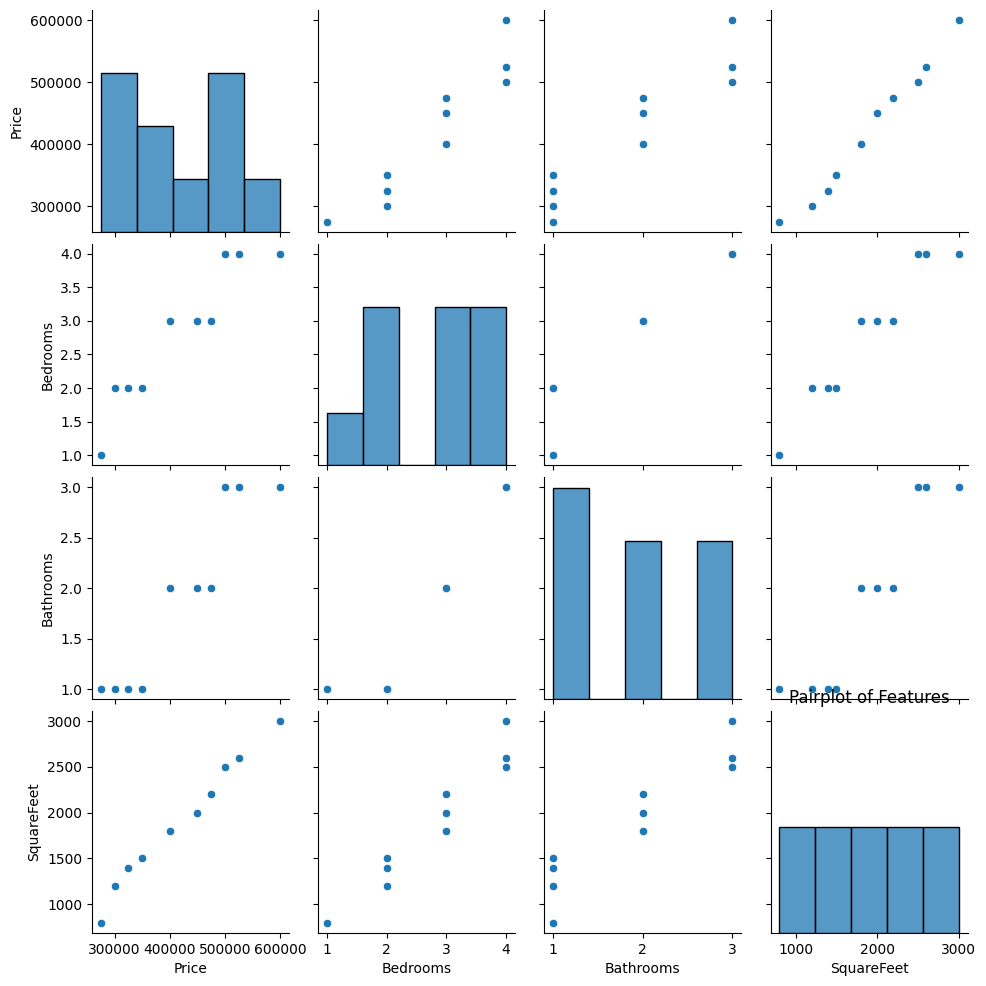

In [9]:
sns.pairplot(data)
plt.title("Pairplot of Features")
plt.show()

In [12]:
# Data Preprocessing: Handling missing values
# Fill missing values in numeric columns with median
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill missing values in non-numeric columns with mode
categorical_cols = data.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill with the most frequent value

In [13]:
# Check for remaining missing values
print("Missing values after preprocessing:")
print(data.isnull().sum())

Missing values after preprocessing:
Price         0
Bedrooms      0
Bathrooms     0
SquareFeet    0
Location      0
dtype: int64


In [14]:
# Encoding categorical features (if any)
data = pd.get_dummies(data, drop_first=True)

In [15]:
# Define Target Variable (y) and Feature Variables (X)
y = data['Price']  # Replace 'Price' with your target variable
X = data.drop(['Price'], axis=1)

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 608371913.5803039
R-squared (R2): 0.9205391786344093


In [20]:
# Prediction
sample_data = X_test.iloc[:5]  # Taking first 5 rows of test data for predictions
sample_predictions = model.predict(sample_data)
print("\nSample Predictions:")
print(sample_predictions)


Sample Predictions:
[521666.66666666 384722.22222222]


In [21]:
# Explanation
print("\nExplanation of Results:")
print("The model's R2 score indicates the proportion of variance in the target variable explained by the features.")
print("The MSE value provides the average squared error between predicted and actual values.")


Explanation of Results:
The model's R2 score indicates the proportion of variance in the target variable explained by the features.
The MSE value provides the average squared error between predicted and actual values.
